# Default Payments of Credit Card Clients in Taiwan from 2005

#About Dataset

#Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

#Content
There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

#Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?
Which variables are the strongest predictors of default payment?

In [8]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#importing the dataset
ccd=pd.read_csv('https://raw.githubusercontent.com/sourbh4050/DATASETS/main/archive/UCI_Credit_Card.csv')


In [10]:
#printing first 10 records to see real structure of the data
ccd.head(10)
# first of all go through the data dictionary to undestand the meaning of data like which variable indicates what

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [11]:
#will check size to ensure whole data is retrived or not
ccd.shape

(30000, 25)

In [12]:
#will check variable values
ccd.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

In [13]:
# will check information about the dataframe
ccd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
# from the information itself we can see there are no null values present so dont need to persorm isnull() operation again
# all data types are good to go
# now categorise all the variables into categorical,continuous and discrete variables for further analysis
# categorical variables:SEX,EDUCATION,MARRIAGE
# contineous variables:LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
# discrete variables:PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,defaulter

In [20]:
#Data exploration part is done and now we will move further to data analysis and manipulation part
# here i can see by mistake PAY_0 has been named insted of PAY_1 and default.payment.next.month seems to be lenghty so will rename it
ccd.rename(columns= {'PAY_0':'PAY_1','default.payment.next.month':'defaulter'},inplace=True)
#now to check whether variable names changed or not
ccd.columns.values



array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'defaulter'], dtype=object)

In [22]:
#now we will start with categorical variables one by one
#for SEX
ccd['SEX'].value_counts()
#SEX is clean

SEX
2    18112
1    11888
Name: count, dtype: int64

In [23]:
#for EDUCATION
ccd['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [27]:
# for education (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) this data is given  here 0 is extra value i can see so we can club 0,4,5,6 into one 4
edu=(ccd['EDUCATION']==0)|(ccd['EDUCATION']==5)|(ccd['EDUCATION']==6)
ccd.loc[edu,'EDUCATION']=4
ccd['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [24]:
# for MARRIAGE
ccd['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [28]:
# for marriage  (1=married, 2=single, 3=others) this is the metadata given here 0 is extra value i can see so i will club this 0 with 3 as others
mar=ccd['MARRIAGE']==0
ccd.loc[mar,'MARRIAGE']=3
ccd['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1efbb5f2350>,
 'caps': [<matplotlib.lines.Line2D at 0x1efbf1de990>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efbf1d6810>],
 'medians': [<matplotlib.lines.Line2D at 0x1efbf271290>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efbf270b10>],
 'means': []}

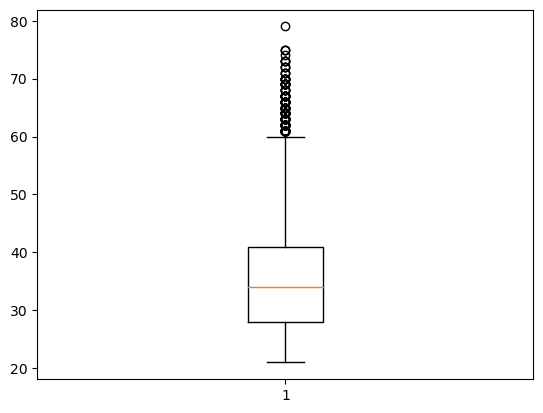

In [32]:
ccd['AGE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
plt.boxplot(ccd['AGE'])

In [37]:
ccd['PAY_1'].value_counts()

PAY_1
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [39]:
cross_p1=pd.crosstab(ccd['PAY_1'],ccd['defaulter'])
cross_p1_perc=cross_p1.apply(lambda x: x/x.sum(),axis=1)
round(cross_p1_perc,2)

defaulter,0,1
PAY_1,,
-2,0.87,0.13
-1,0.83,0.17
0,0.87,0.13
1,0.66,0.34
2,0.31,0.69
3,0.24,0.76
4,0.32,0.68
5,0.50,0.50
6,0.45,0.55


In [48]:
pyu1=(ccd['PAY_1']==0)|(ccd['PAY_1']==-1)|(ccd['PAY_1']==-2)
ccd.loc[pyu1,'PAY_1']=0
pyu2=(ccd['PAY_2']==0)|(ccd['PAY_2']==-1)|(ccd['PAY_2']==-2)
ccd.loc[pyu2,'PAY_2']=0
pyu3=(ccd['PAY_3']==0)|(ccd['PAY_3']==-1)|(ccd['PAY_3']==-2)
ccd.loc[pyu3,'PAY_3']=0
pyu4=(ccd['PAY_4']==0)|(ccd['PAY_4']==-1)|(ccd['PAY_4']==-2)
ccd.loc[pyu4,'PAY_4']=0
pyu5=(ccd['PAY_5']==0)|(ccd['PAY_5']==-1)|(ccd['PAY_5']==-2)
ccd.loc[pyu5,'PAY_5']=0
pyu6=(ccd['PAY_6']==0)|(ccd['PAY_6']==-1)|(ccd['PAY_6']==-2)
ccd.loc[pyu6,'PAY_6']=0

ccd['PAY_1'].value_counts()
ccd['PAY_2'].value_counts()
ccd['PAY_3'].value_counts()
ccd['PAY_4'].value_counts()
ccd['PAY_5'].value_counts()
ccd['PAY_6'].value_counts()

PAY_2
0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: count, dtype: int64

In [51]:
ccd[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.10,278.90,0.00,0.00,0.00,0.00,0.00
0.20,1892.80,1472.80,1187.80,988.00,763.00,476.00
0.30,6050.40,5500.00,5219.20,4643.70,3637.00,2701.70
0.40,13469.20,12799.60,12197.20,11145.00,9809.20,8770.20
0.50,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00
0.60,37045.20,34773.80,31401.00,28604.40,26690.40,25508.40
0.70,52204.90,50690.00,49217.30,45456.60,40943.20,39252.20
0.80,83421.20,80292.20,76777.40,70579.00,65823.00,63150.60
0.90,142133.70,136905.50,132051.30,122418.70,115883.00,112110.40
0.91,151214.72,145064.86,139419.08,130937.09,123655.36,120740.53


In [68]:
ccd.loc[ccd['BILL_AMT1']>350110.68,'BILL_AMT1']=ccd['BILL_AMT1'].median()
ccd.loc[ccd['BILL_AMT2']>337495.28,'BILL_AMT2']=ccd['BILL_AMT2'].median()
ccd.loc[ccd['BILL_AMT3']>325030.39,'BILL_AMT3']=ccd['BILL_AMT3'].median()
ccd.loc[ccd['BILL_AMT4']>304997.27,'BILL_AMT4']=ccd['BILL_AMT4'].median()
ccd.loc[ccd['BILL_AMT5']>285868.33,'BILL_AMT5']=ccd['BILL_AMT5'].median()
ccd.loc[ccd['BILL_AMT6']>279505.06,'BILL_AMT6']=ccd['BILL_AMT6'].median()
ccd[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.10,278.90,0.00,0.000,0.00,0.000,0.00
0.20,1892.80,1472.80,1187.800,988.00,763.000,476.00
0.30,6050.40,5500.00,5219.200,4643.70,3637.000,2701.70
0.40,13469.20,12799.60,12197.200,11145.00,9809.200,8770.20
0.50,22381.25,21198.50,20088.125,19052.00,18104.125,17068.75
0.60,34951.00,32802.40,30128.000,27850.00,25635.200,24263.80
0.70,50679.30,49664.30,48167.800,43514.20,38900.900,37081.20
0.80,79868.00,77361.40,73069.800,67501.20,61746.400,59393.00
0.90,134628.90,130283.90,124691.500,115045.10,108074.900,105286.10
0.91,142133.53,136905.05,132051.270,122418.43,115882.900,112110.06


{'whiskers': [<matplotlib.lines.Line2D at 0x1efc3fd0050>,
 'caps': [<matplotlib.lines.Line2D at 0x1efc3fe0350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efc3fd3690>,
 'medians': [<matplotlib.lines.Line2D at 0x1efc3f93ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1efc3f934d0>,
 'means': []}

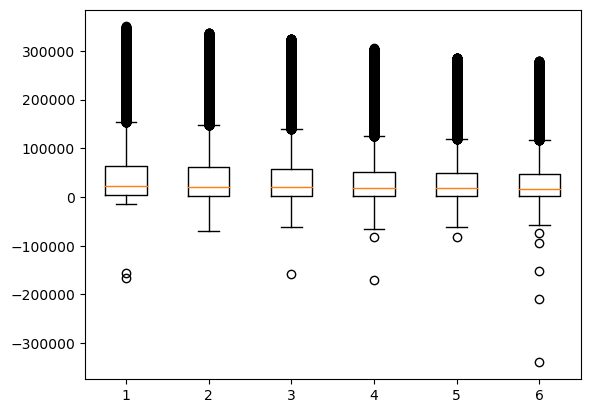

In [61]:
plt.boxplot(ccd[['BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])

In [64]:
ccd[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0.10,0.00,0.00,0.00,0.00,0.00,0.00
0.20,316.00,268.80,2.80,0.00,0.00,0.00
0.30,1263.70,1165.00,780.00,500.00,500.00,426.00
0.40,1724.00,1600.00,1206.00,1000.00,1000.00,1000.00
0.50,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
0.60,3000.00,3000.00,2500.00,2100.00,2123.40,2100.00
0.70,4309.30,4045.30,3560.30,3200.00,3200.00,3200.00
0.80,6192.20,6000.00,5284.00,5000.00,5000.00,5000.00
0.90,10300.00,10401.10,10000.00,9570.60,9500.00,9600.00
0.91,11174.00,11320.00,10288.36,10000.00,10000.00,10000.00


In [69]:
ccd.loc[ccd['PAY_AMT1']>66522.18,'PAY_AMT1']=ccd['PAY_AMT1'].median()
ccd.loc[ccd['PAY_AMT2']>76651.02,'PAY_AMT2']=ccd['PAY_AMT2'].median()
ccd.loc[ccd['PAY_AMT3']>70000.00,'PAY_AMT3']=ccd['PAY_AMT3'].median()
ccd.loc[ccd['PAY_AMT4']>67054.44,'PAY_AMT4']=ccd['PAY_AMT4'].median()
ccd.loc[ccd['PAY_AMT5']>65607.56,'PAY_AMT5']=ccd['PAY_AMT5'].median()
ccd.loc[ccd['PAY_AMT6']>82619.05,'PAY_AMT6']=ccd['PAY_AMT6'].median()
ccd[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0.10,0.00,0.00,0.00,0.00,0.00,0.00
0.20,316.00,268.80,2.80,0.00,0.00,0.00
0.30,1263.70,1165.00,780.00,500.00,500.00,426.00
0.40,1724.00,1600.00,1206.00,1000.00,1000.00,1000.00
0.50,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
0.60,3000.00,3000.00,2333.80,2005.00,2013.00,2000.00
0.70,4086.60,4000.00,3415.30,3014.00,3029.30,3020.00
0.80,6000.00,5872.40,5022.20,5000.00,5000.00,5000.00
0.90,10000.00,10000.00,9500.00,8599.10,8500.00,8585.10
0.91,10300.00,10400.99,10000.00,9570.54,9500.00,9600.00


In [82]:
ccd.loc[ccd['LIMIT_BAL']>500000,'LIMIT_BAL']=ccd['LIMIT_BAL'].median()
ccd['LIMIT_BAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
ccd['LIMIT_BAL'].median()

140000.0